In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

from tqdm import tqdm

In [5]:
EPS = 1e-6

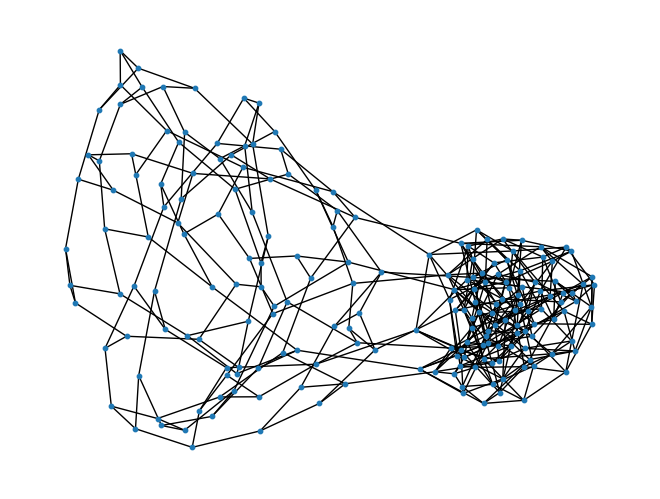

In [6]:
graph_1 = nx.random_regular_graph(d=3, n=100)
graph_2 = nx.random_regular_graph(d=5, n=100)
graph = nx.union(graph_1, graph_2, rename=('R', 'C'))

num_random_edges = 10

for i in range(num_random_edges):
    random_u = random.choice(list(graph_1.nodes))
    random_v = random.choice(list(graph_2.nodes))
    u = 'R' + str(random_u)
    v = 'C' + str(random_v)
    graph.add_edge(u, v)

    
for edge in graph.edges:
    graph.add_edge(edge[0], edge[1], weight=1)

import random
node1 = random.choice(list(graph.nodes))
node2 = random.choice(list(graph.nodes))
for node in graph.neighbors(node1):
    graph[node1][node]['weight'] += 10
for node in graph.neighbors(node2):
    graph[node2][node]['weight'] += 10

nx.draw(graph, node_size=10)

In [211]:
regular_graph = nx.random_regular_graph(d=3, n=100)
clique_graph = nx.connected_caveman_graph(l=10, k=20)
graph = nx.union(regular_graph, clique_graph, rename=('R', 'C'))
num_random_edges = 20
for i in range(num_random_edges):
    random_u = random.choice(list(regular_graph.nodes))
    random_v = random.choice(list(clique_graph.nodes))
    u = 'R' + str(random_u)
    v = 'C' + str(random_v)
    graph.add_edge(u, v)

In [126]:
graph = nx.Graph()
data = np.loadtxt('ca-AstroPh.txt')
data = data[:1500]
graph.add_edges_from(data)

In [213]:
for edge in graph.edges():
    if 'weight' not in graph[edge[0]][edge[1]]:
        graph[edge[0]][edge[1]]['weight'] = 1
    else:
        graph[edge[0]][edge[1]]['weight'] += 1

In [7]:
for node in tqdm(graph.nodes(), total=len(graph.nodes())):
    egonet = graph.subgraph(list(graph.neighbors(node)) + [node])
    num_neighbours = len(egonet.nodes())
    num_edges = len(egonet.edges())
    total_weight = sum([egonet[edge[0]][edge[1]]['weight'] for edge in egonet.edges()])
    adj_matrix = nx.adjacency_matrix(egonet).todense()
    lambda_w = np.max(np.linalg.eigvals(adj_matrix))
    nx.set_node_attributes(graph, {node: {'num_neighbours': num_neighbours, 'num_edges': num_edges, 'total_weight': total_weight, 'lambda_w': lambda_w}})
    

100%|██████████| 200/200 [00:00<00:00, 3325.78it/s]


100%|██████████| 200/200 [00:00<00:00, 213831.46it/s]


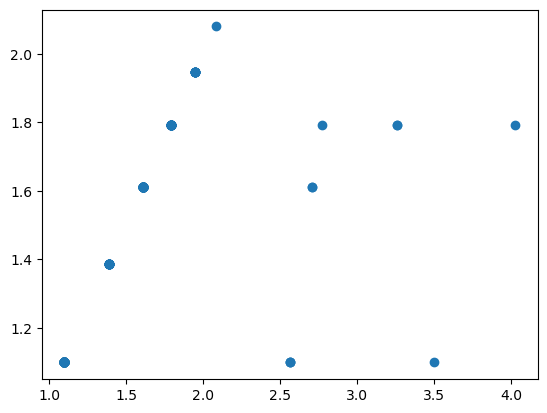

In [10]:
es = []
ns = []
ws = []

for node in tqdm(graph.nodes(), total=len(graph.nodes())):
    e = graph.nodes[node]['num_edges']
    n = graph.nodes[node]['num_neighbours']
    w = graph.nodes[node]['total_weight']
    
    e = np.log(e)
    n = np.log(n)
    w = np.log(w)
    
    es.append(e)
    ns.append(n)
    ws.append(w)

plt.scatter(ws, es)
plt.show()

In [216]:
X = np.array(ns).reshape(-1, 1)
y = np.array(es).reshape(-1, 1)

In [11]:
X = np.array(ws).reshape(-1, 1)
y = np.array(es).reshape(-1, 1)

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
model_lof = LocalOutlierFactor(n_neighbors=20)
model_lof.fit(X, y)

LocalOutlierFactor()

In [15]:
for node in tqdm(graph.nodes(), total=len(graph.nodes())):
    e = graph.nodes[node]['num_edges']
    n = graph.nodes[node]['num_neighbours']
    w = graph.nodes[node]['total_weight']
    
    prediction = model.predict(np.array(np.log(w)).reshape(-1, 1)).flatten()[0]
    prediction = np.exp(prediction)
    
    score = max(e, prediction) / min(e, prediction) * np.log(np.abs(e - prediction) + 1)
    
    nx.set_node_attributes(graph, {node: {'score': score}})

100%|██████████| 200/200 [00:00<00:00, 14261.97it/s]


In [16]:
# normalizing the scores
scores = [graph.nodes[node]['score'] for node in graph.nodes()]
scores = np.array(scores)
scores = (scores - scores.min()) / (scores.max() - scores.min())


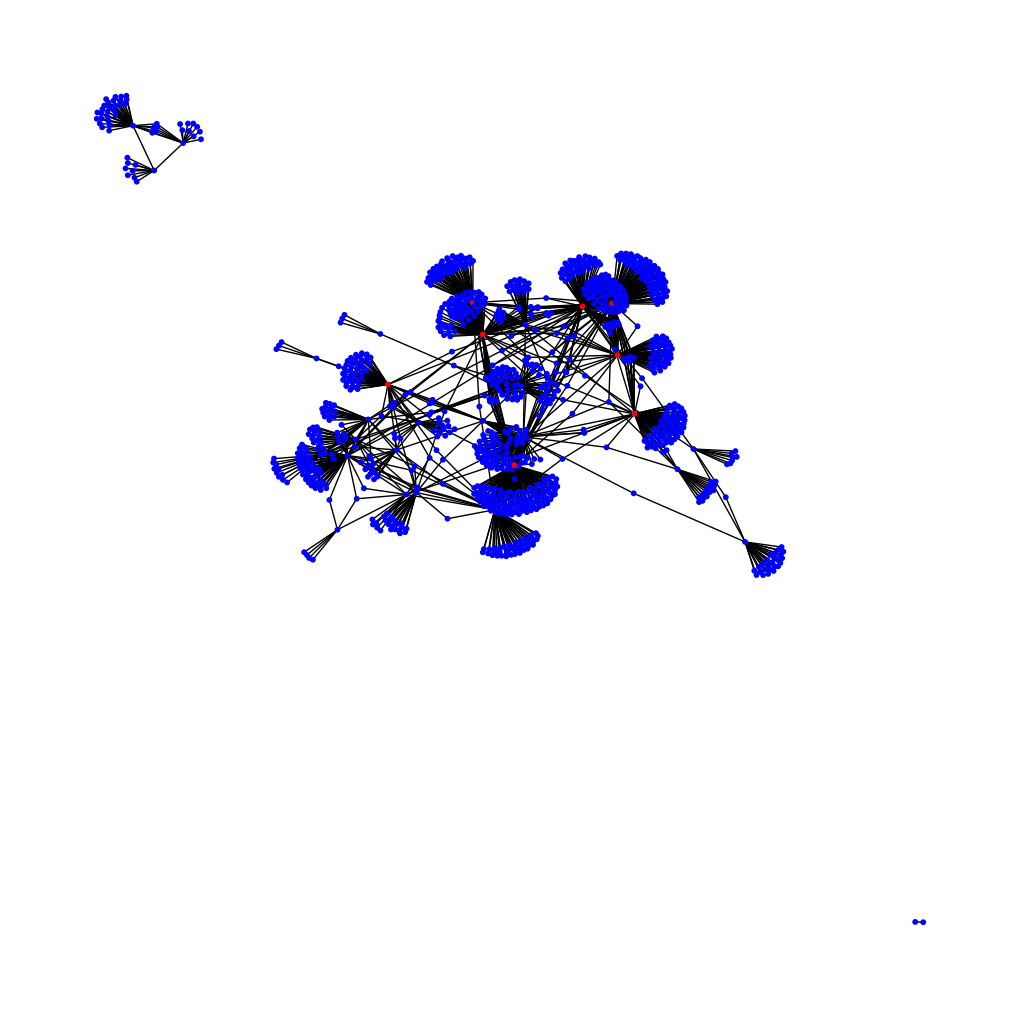

In [136]:
top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()

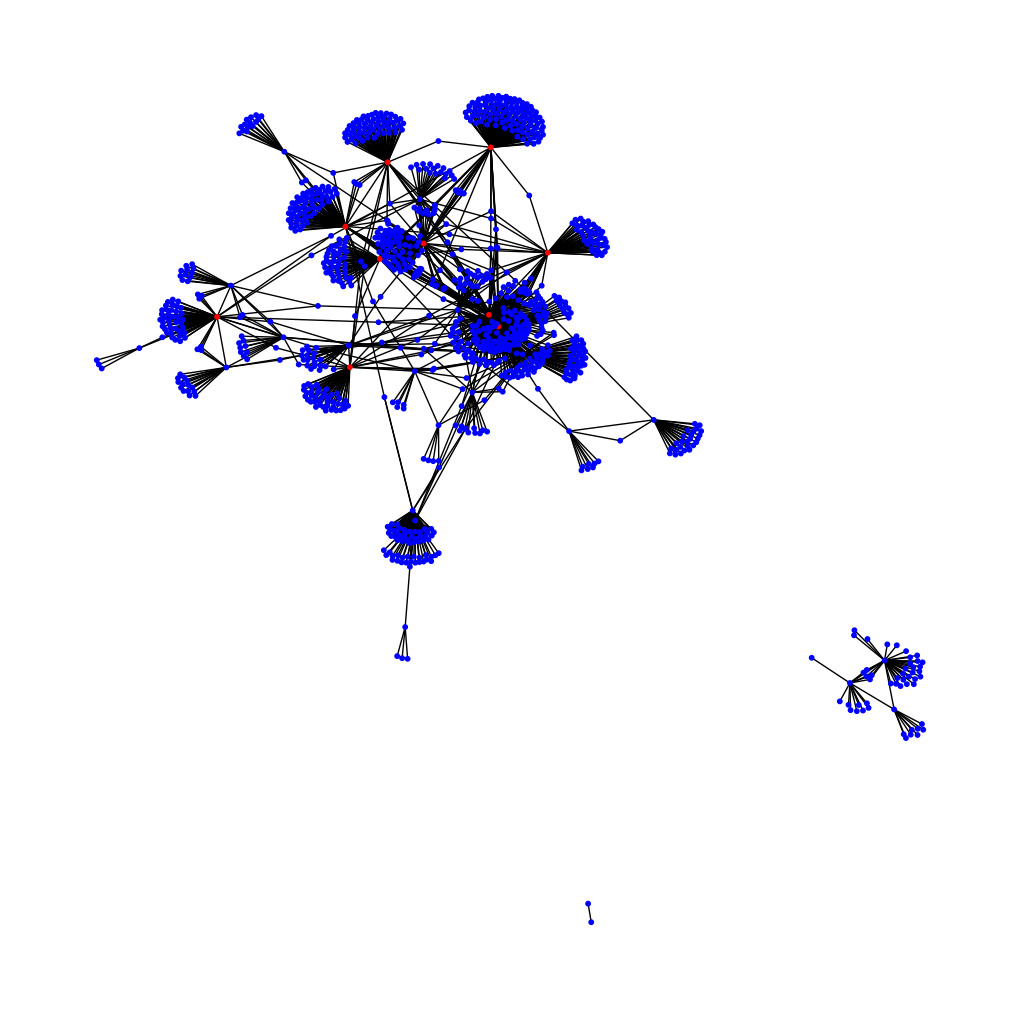

In [141]:
scores_lof = model_lof.fit_predict(X, y)
scores_lof = (scores_lof - scores_lof.min()) / (scores_lof.max() - scores_lof.min())

scores = scores + scores_lof

top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()

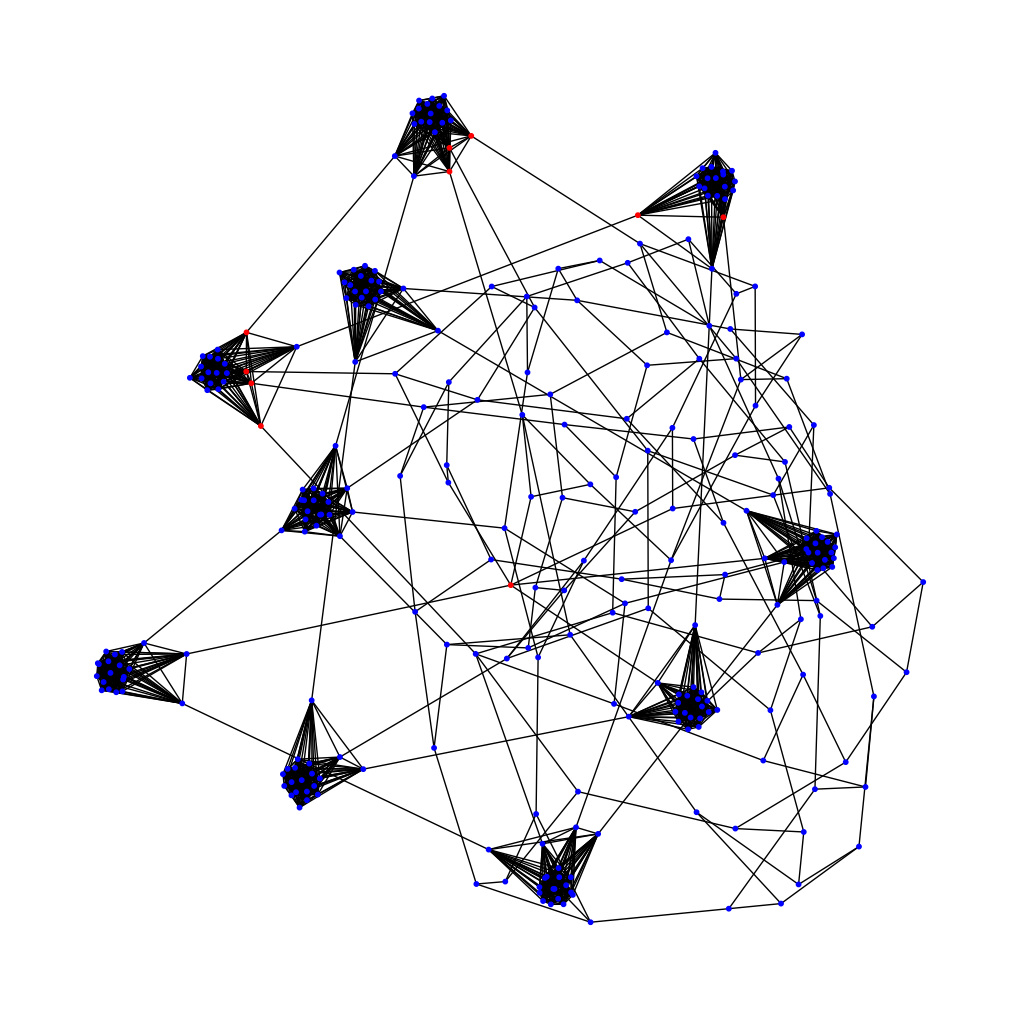

In [222]:
top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()

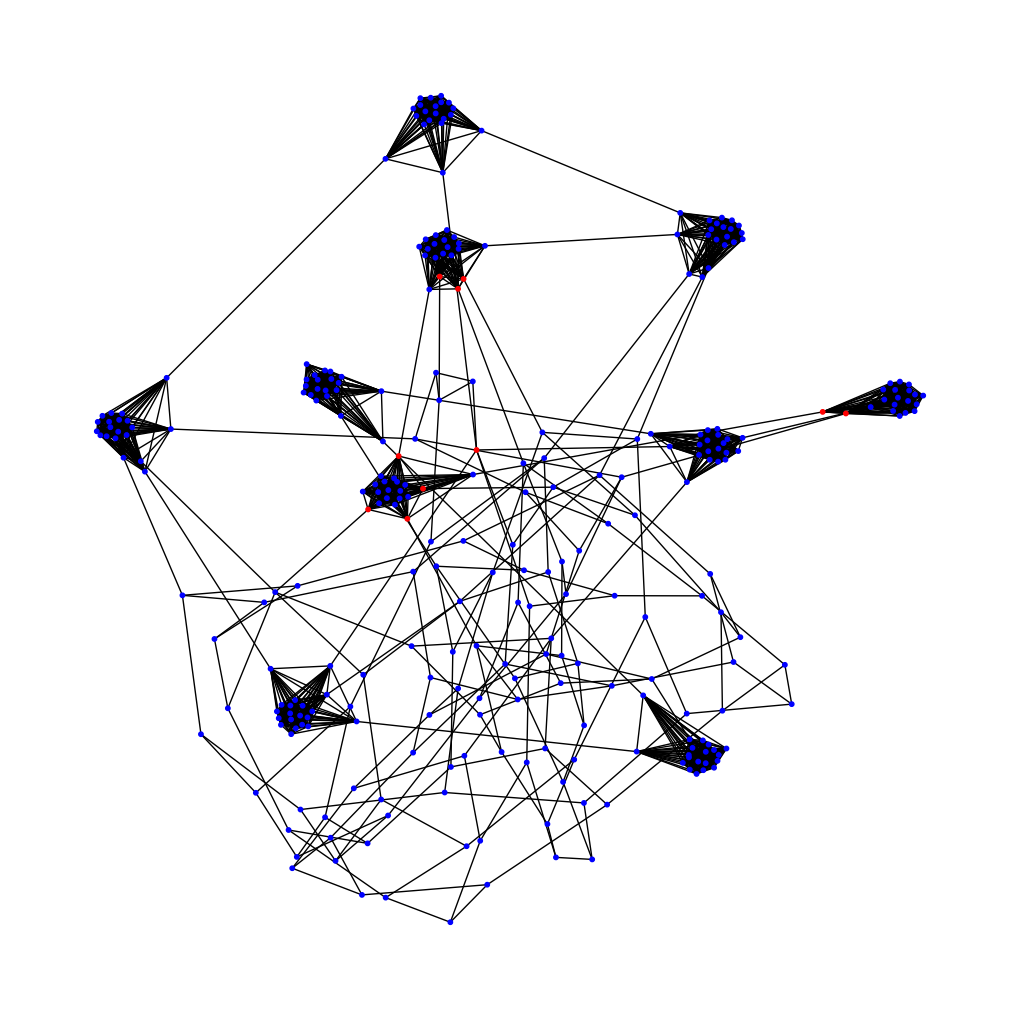

In [223]:
scores_lof = model_lof.fit_predict(X, y)
scores_lof = (scores_lof - scores_lof.min()) / (scores_lof.max() - scores_lof.min())

scores = scores + scores_lof

top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()

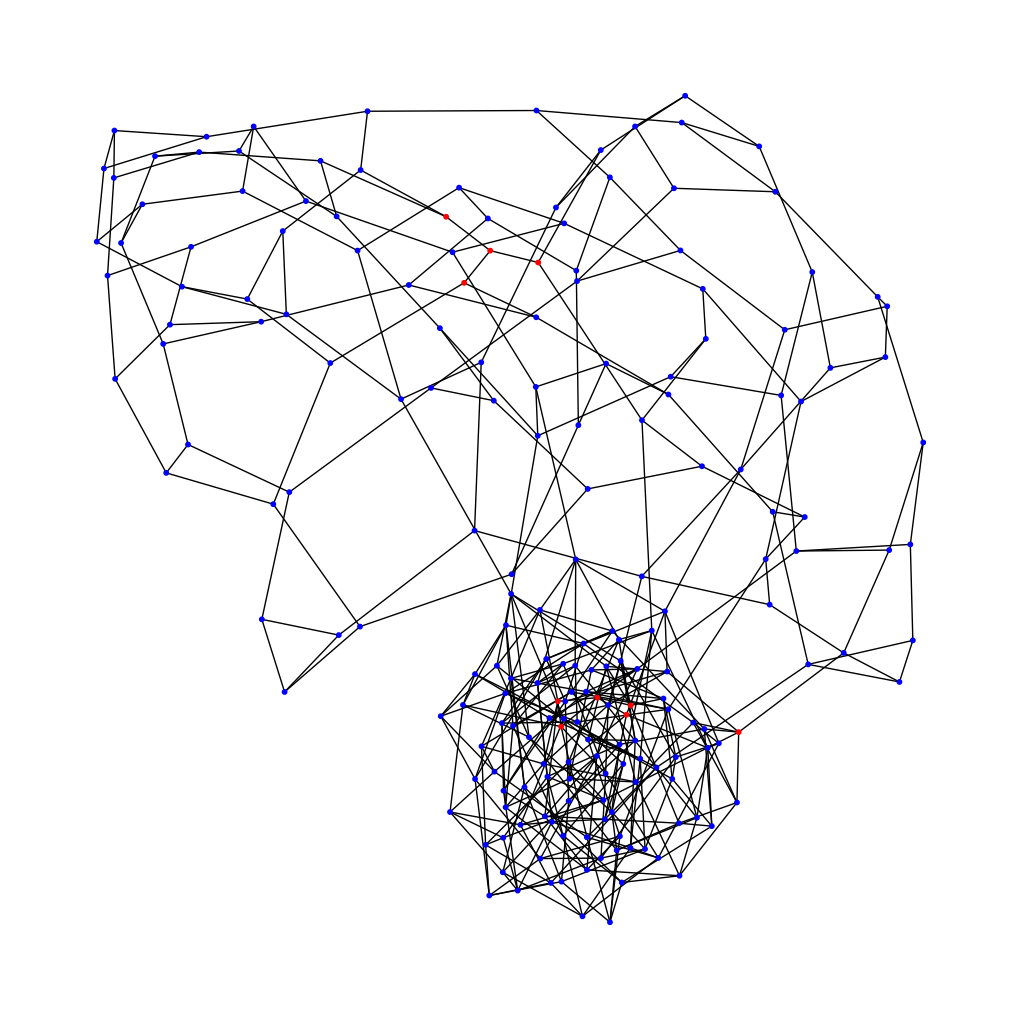

In [17]:
top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()

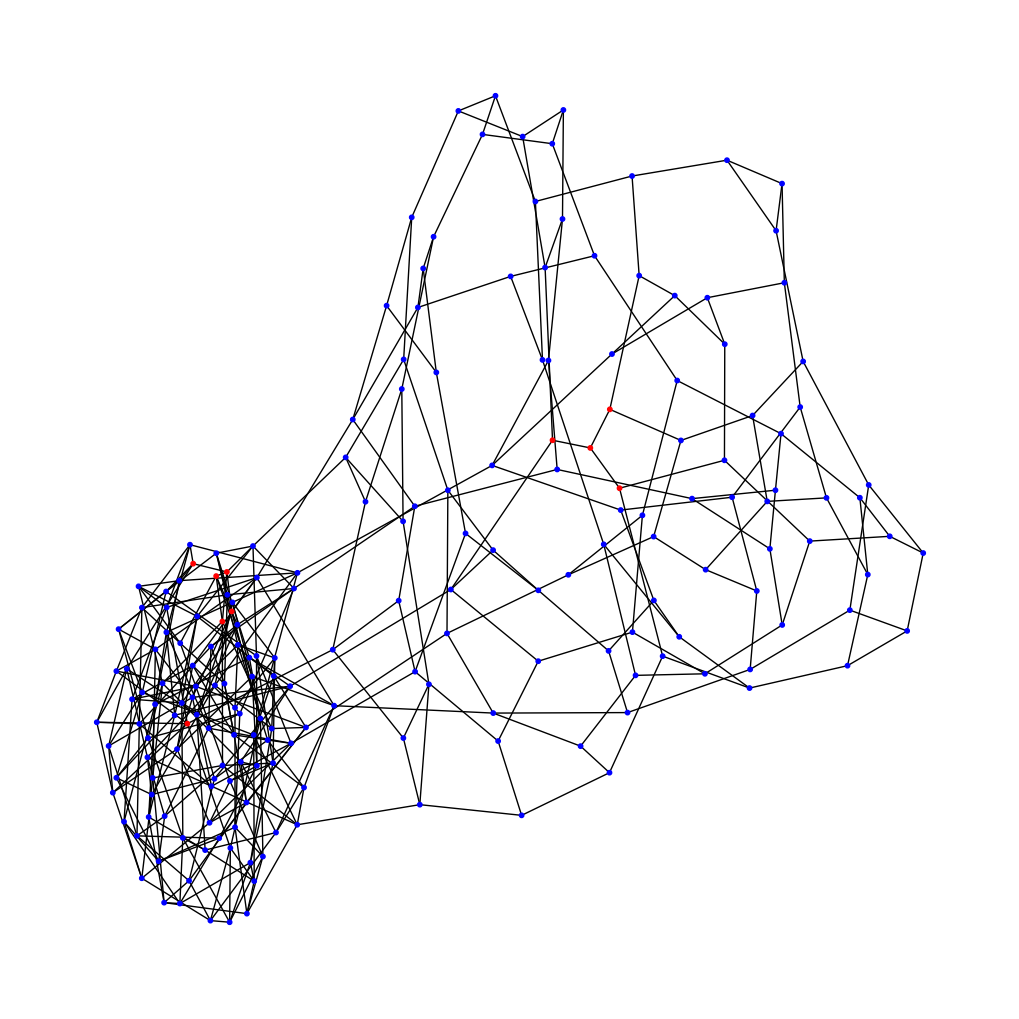

In [18]:
scores_lof = model_lof.fit_predict(X, y)
scores_lof = (scores_lof - scores_lof.min()) / (scores_lof.max() - scores_lof.min())

scores = scores + scores_lof

top_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[:10]
rest_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['score'], reverse=True)[10:]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=['r' if node in [node[0] for node in top_nodes] else 'b' for node in graph.nodes()], node_size=10)
plt.show()